In [2]:
import pandas as pd
import numpy as np
#to interact with files
from glob import glob
#for loops
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [3]:
annot = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/annot.parquet')
imgs = pd.read_parquet('../input/textocr-text-extraction-from-images-dataset/img.parquet')
img_fns = glob('../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/*')

# Take a look at the data

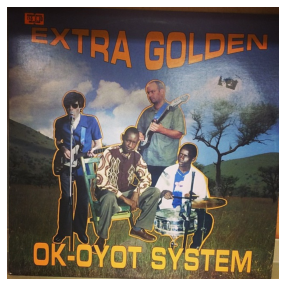

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[0]))
ax.axis('off')
plt.show()

In [5]:
image_id = img_fns[0]
print(image_id)

../input/textocr-text-extraction-from-images-dataset/train_val_images/train_images/f644219f560e3778.jpg


In [6]:
# take the id from the path
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

id          image_id                             bbox  \
674889  f644219f560e3778_1  f644219f560e3778     [64.54, 22.34, 75.25, 47.22]   
674890  f644219f560e3778_2  f644219f560e3778   [68.97, 62.18, 419.03, 191.81]   
674891  f644219f560e3778_3  f644219f560e3778   [510.13, 81.36, 486.9, 180.01]   
674892  f644219f560e3778_4  f644219f560e3778   [89.63, 876.63, 432.3, 118.03]   
674893  f644219f560e3778_5  f644219f560e3778  [532.26, 892.86, 402.8, 118.03]   

       utf8_string                                             points  \
674889           .  [67.49, 22.34, 139.79, 28.25, 139.79, 69.56, 6...   
674890       EXTRA  [77.82, 62.18, 488.0, 71.03, 483.57, 253.99, 6...   
674891      GOLDEN  [511.6, 81.36, 995.55, 82.84, 997.03, 242.19, ...   
674892     OK-OYOT  [91.1, 876.63, 521.93, 889.91, 521.93, 994.66,...   
674893      SYSTEM  [532.26, 892.86, 935.06, 910.56, 930.63, 1010....   

            area  
674889   3553.30  
674890  80374.14  
674891  87646.87  
674892  51024.37  
674893  47542.48

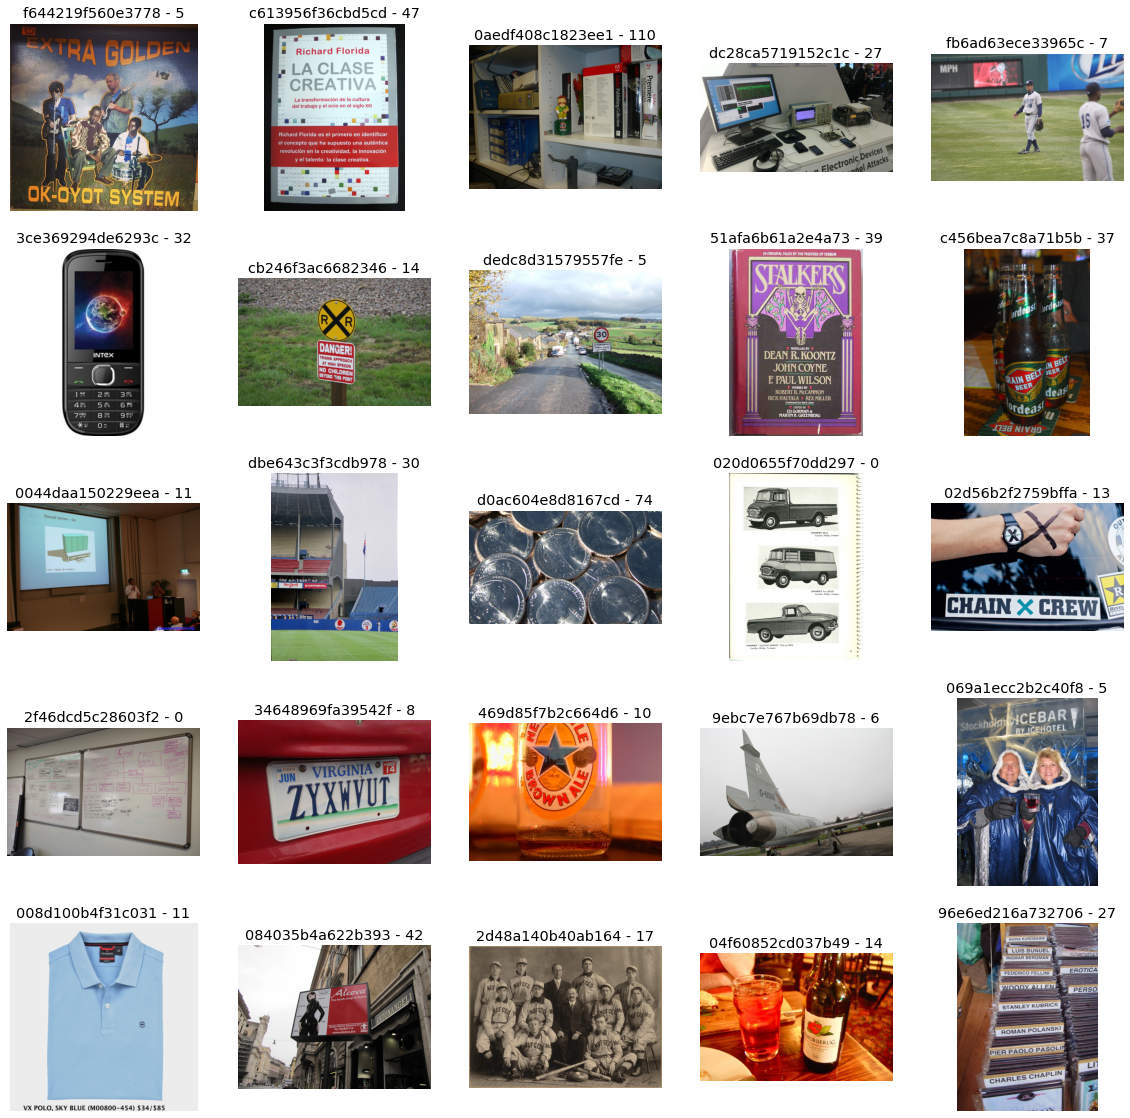

In [7]:
#display 25 image
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

# Method 1: pytesseract

In [8]:
#pip install pytesseract
import pytesseract

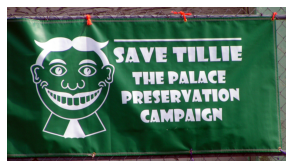

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[120]))
ax.axis('off')
plt.show()

In [10]:
# Example call
print(pytesseract.image_to_string(img_fns[120], lang='eng'))

 

 

 

 

 

 

   
 

THE PALACE L
PRESERVATION
UAT

 



# Method 2: easyOCR

In [11]:
#pip install easyocr
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

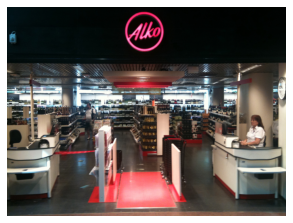

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(plt.imread(img_fns[121]))
ax.axis('off')
plt.show()

In [13]:
results = reader.readtext(img_fns[121])

In [14]:
pd.DataFrame(results, columns=['bbox','text','conf'])

bbox   text     conf
0  [[448.3313292672196, 56.15604511626376], [572....  Alko)  0.66627

# Method 3: keras_ocr

In [15]:
#-q keep the installation silent doesn't show the code while running
!pip install keras-ocr -q

In [16]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


2022-09-18 08:40:57.752827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 08:40:57.753900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 08:40:57.754548: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 08:40:57.755302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Looking for /root/.keras-ocr/crnn_kurapan.h5


In [17]:
results = pipeline.recognize([img_fns[11]])

2022-09-18 08:41:04.464598: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-18 08:41:04.950969: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [18]:
pd.DataFrame(results[0], columns=['text', 'bbox'])

text                                               bbox
0           dog  [[6.0, 599.0], [31.0, 599.0], [31.0, 610.0], [...
1          dirt  [[67.53808, 597.46704], [104.066, 600.0762], [...
2         devil  [[101.0, 600.0], [149.0, 600.0], [149.0, 622.0...
3   continental  [[200.06012, 606.7333], [302.16663, 608.1714],...
4          food  [[2.0, 611.0], [34.0, 611.0], [34.0, 623.0], [...
5           gte  [[595.0, 718.0], [619.0, 718.0], [619.0, 726.0...
6      litersts  [[152.32657, 772.63214], [228.6387, 776.5456],...
7           400  [[230.0, 800.0], [261.0, 800.0], [261.0, 819.0...
8          earl  [[507.10864, 809.71954], [536.4231, 811.1154],...
9       averill  [[500.0, 821.0], [545.0, 821.0], [545.0, 831.0...
10            3  [[515.0, 833.0], [530.0, 833.0], [530.0, 854.0...
11         9z0s  [[357.0, 835.0], [394.0, 835.0], [394.0, 853.0...
12         sz0s  [[653.1139, 841.69354], [691.4132, 843.0142], ...

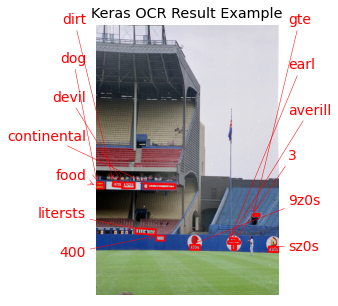

In [19]:
fig, ax = plt.subplots(figsize=(6, 5))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[11]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

# Compare easyocr vs. keras_ocr

In [20]:
# easyocr
#apply easycor for 25 images
reader = easyocr.Reader(['en'], gpu = True)

dfs = []
for img in tqdm(img_fns[:25]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

  0%|          | 0/25 [00:00<?, ?it/s]

In [21]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns[:25]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/25 [00:00<?, ?it/s]

# Plot Results: easyocr vs keras_ocr

In [35]:

def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(10, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

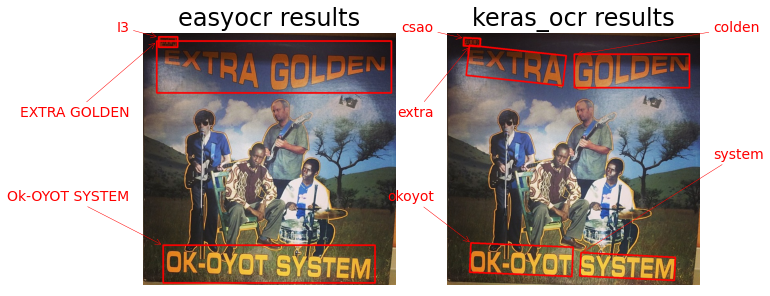

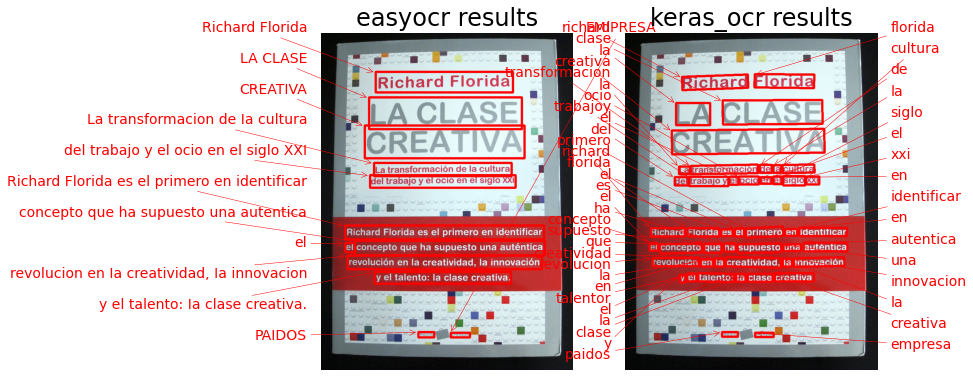

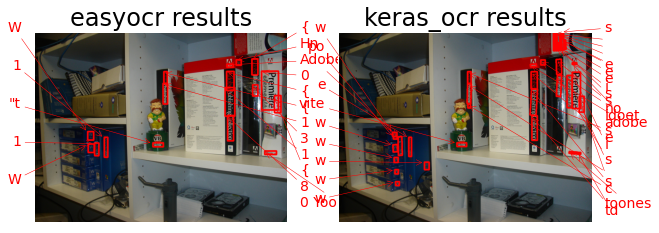

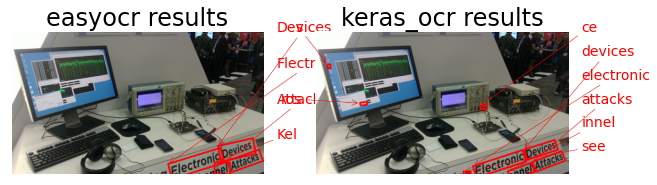

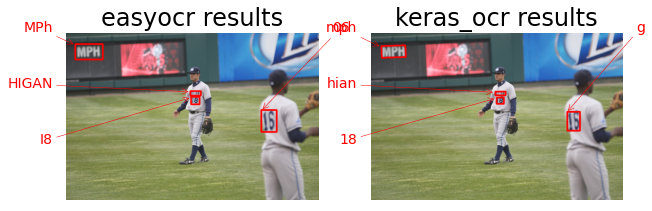

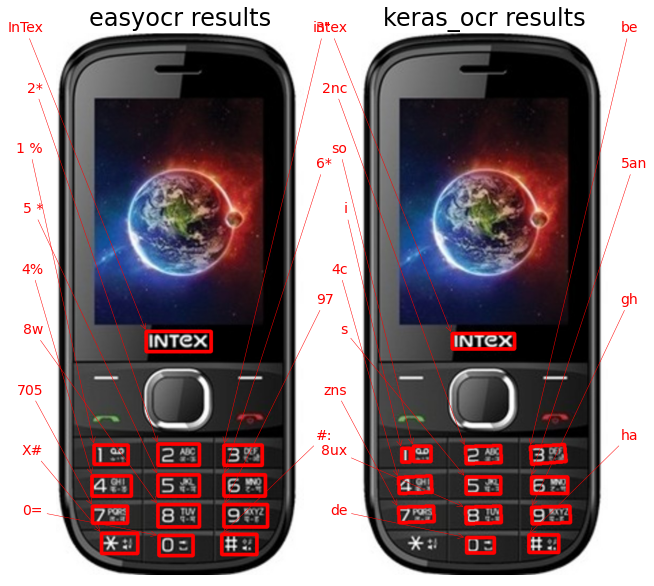

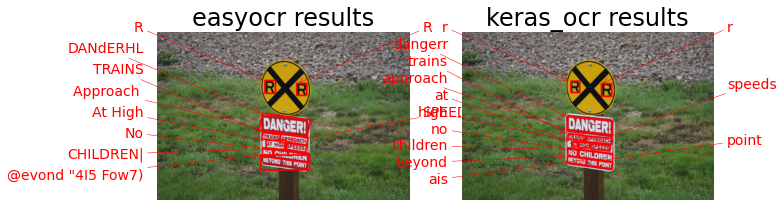

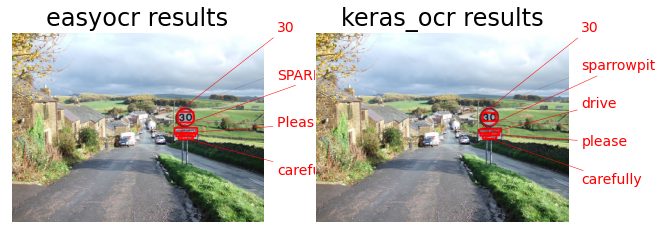

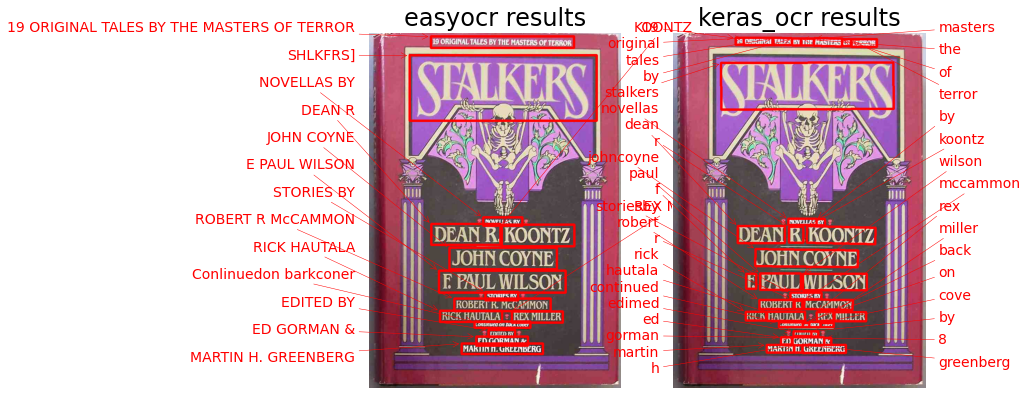

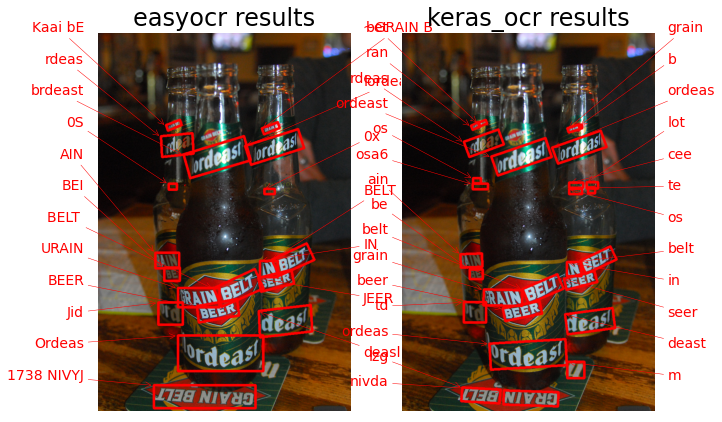

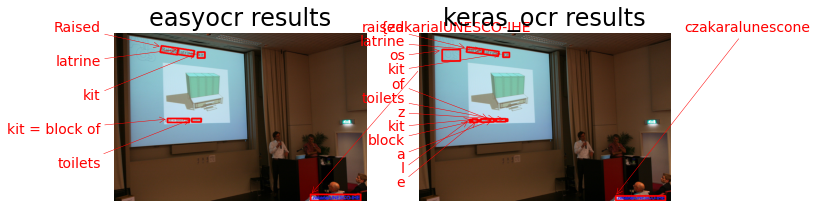

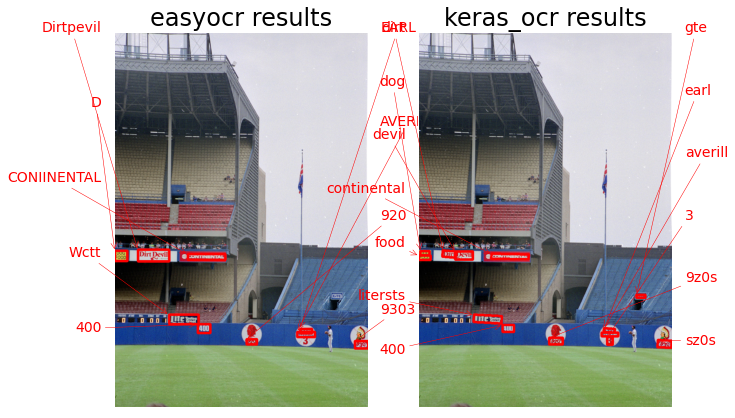

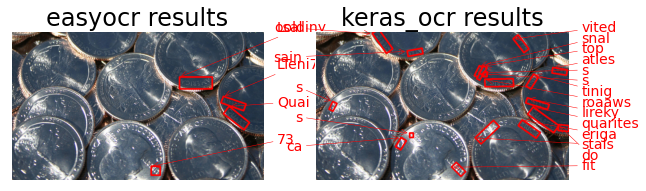

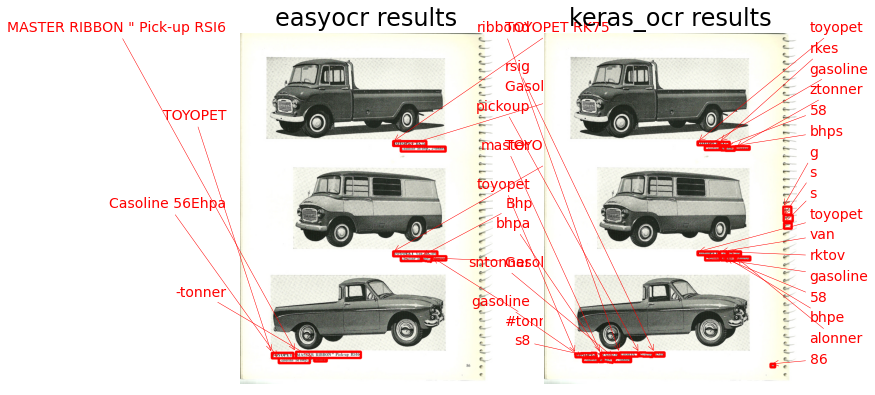

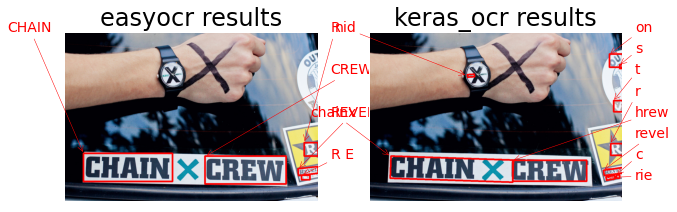

In [37]:
#loop over results
for img_fn in img_fns[:15]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)